# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73159.20 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 93612.09 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 117229.76 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 128290.53 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 134234.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 116944.93 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 77463.04 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101850.63 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 143665.26 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 147908.61 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 151207.80 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 123774.21 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.42 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.89 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.02 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.30 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.18 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.99 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 33.29 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.33 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.46 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.33 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.01 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.92 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.33 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.32 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.49 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.58 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.62 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.22 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 30.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.48 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.66 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.86 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.35 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.52 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.61 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.37 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.33 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.81 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.83 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.02 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.55 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.05 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.49 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.03 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.98 examples/s]

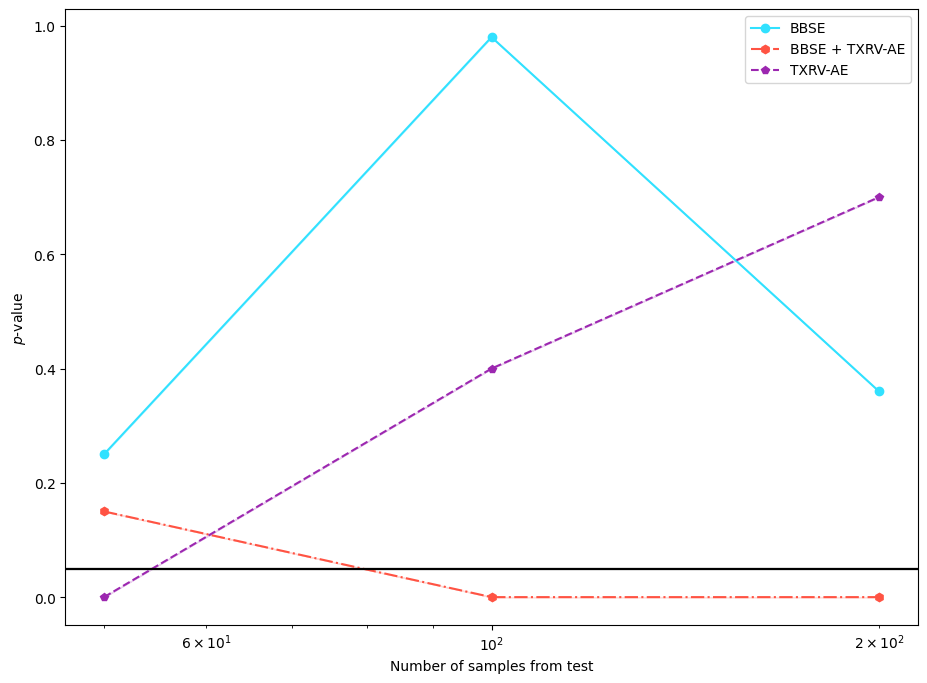

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.22 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.72 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.92 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.31 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.36 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.83 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.53 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.44 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.04 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.18 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.73 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.74 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.74 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.88 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.14 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.82 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.42 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.12 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.44 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.42 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.04 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.07 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.06 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.38 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.13 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.10 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.39 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.69 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.89 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.69 examples/s]

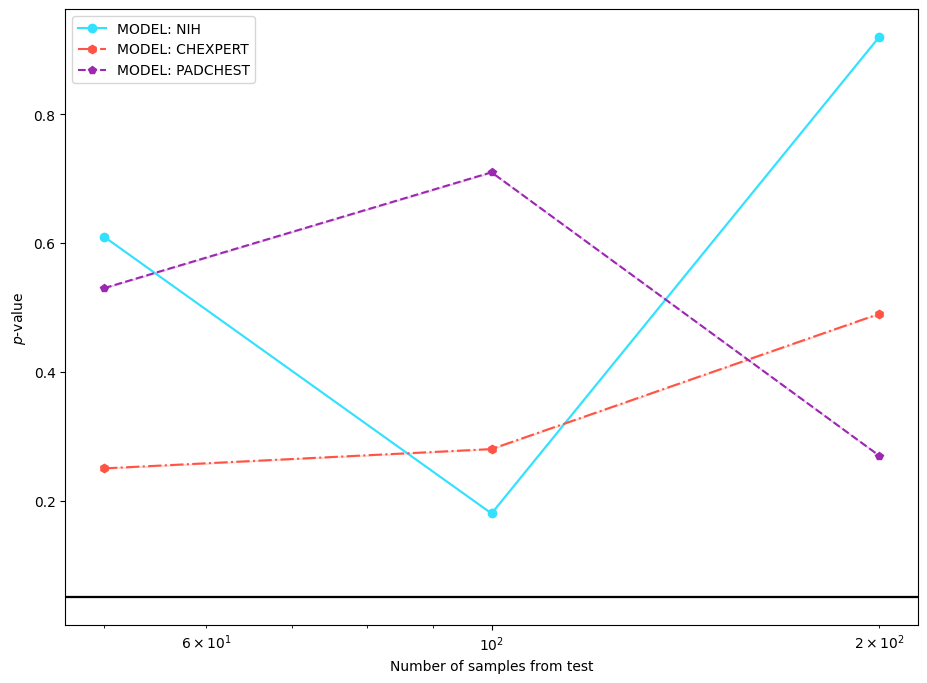

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51233.74 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71695.79 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83830.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92841.25 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101808.51 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 114559.98 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 85069.11 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56990.98 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81669.83 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93076.80 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100911.01 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106067.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113047.12 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 89274.48 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.13 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.29 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.71 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.21 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.11 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.25 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.72 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.34 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.72 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.28 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.01 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.48 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.43 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54539.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73969.39 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83853.36 examples/s]

Filter (num_proc=6):  61%|██████    | 68061/112120 [00:00<00:00, 79091.65 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101116.03 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102417.64 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 81143.75 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56704.88 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79126.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91701.79 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101772.17 examples/s]

Filter (num_proc=6):  82%|████████▏ | 91748/112120 [00:01<00:00, 96944.39 examples/s] 

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104779.63 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 84815.76 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:13, 12.89 examples/s]

Map:  32%|███▏      | 64/200 [00:03<00:05, 22.75 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 30.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:02, 35.75 examples/s]

Map:  80%|████████  | 160/200 [00:05<00:01, 39.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 42.07 examples/s]

Map: 100%|██████████| 200/200 [00:06<00:00, 37.05 examples/s]

Map: 100%|██████████| 200/200 [00:06<00:00, 32.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 14.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.10 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:06, 10.68 examples/s]

Map:  64%|██████▍   | 64/100 [00:03<00:01, 19.47 examples/s]

Map:  96%|█████████▌| 96/100 [00:04<00:00, 26.19 examples/s]

Map: 100%|██████████| 100/100 [00:04<00:00, 26.10 examples/s]

Map: 100%|██████████| 100/100 [00:04<00:00, 21.84 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:15, 11.00 examples/s]

Map:  32%|███▏      | 64/200 [00:03<00:06, 20.71 examples/s]

Map:  48%|████▊     | 96/200 [00:05<00:06, 17.28 examples/s]

Map:  64%|██████▍   | 128/200 [00:07<00:04, 17.72 examples/s]

Map:  80%|████████  | 160/200 [00:09<00:02, 16.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:11<00:00, 17.38 examples/s]

Map: 100%|██████████| 200/200 [00:11<00:00, 18.04 examples/s]

Map: 100%|██████████| 200/200 [00:11<00:00, 17.32 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  11%|█         | 12000/112120 [00:00<00:03, 29997.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71863.36 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83026.32 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92663.41 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98455.17 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105068.67 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 80041.34 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 47197.30 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71706.07 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83712.43 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92998.49 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95478.10 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102550.72 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 80501.02 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.36 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.83 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.71 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.19 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.45 examples/s]

Map:  64%|██████▍   | 64/100 [00:03<00:02, 16.10 examples/s]

Map:  96%|█████████▌| 96/100 [00:05<00:00, 17.22 examples/s]

Map: 100%|██████████| 100/100 [00:05<00:00, 17.20 examples/s]

Map: 100%|██████████| 100/100 [00:05<00:00, 16.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:03<00:16,  9.90 examples/s]

Map:  32%|███▏      | 64/200 [00:04<00:09, 14.11 examples/s]

Map:  48%|████▊     | 96/200 [00:06<00:06, 14.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:07<00:03, 21.17 examples/s]

Map:  80%|████████  | 160/200 [00:07<00:01, 27.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:08<00:00, 32.87 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 33.87 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 22.99 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51573.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72730.44 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84497.26 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89463.85 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93185.77 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96768.25 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 77925.39 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48475.25 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67482.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86923.85 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94996.51 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98748.22 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107368.32 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 82326.42 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.65 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.33 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.88 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:04<00:02,  7.49 examples/s]

Map: 100%|██████████| 50/50 [00:05<00:00,  9.97 examples/s]

Map: 100%|██████████| 50/50 [00:05<00:00,  9.36 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:06, 10.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:03<00:01, 20.54 examples/s]

Map:  96%|█████████▌| 96/100 [00:04<00:00, 28.24 examples/s]

Map: 100%|██████████| 100/100 [00:04<00:00, 23.34 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.77 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.37 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.39 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.92 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.36 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.87 examples/s]

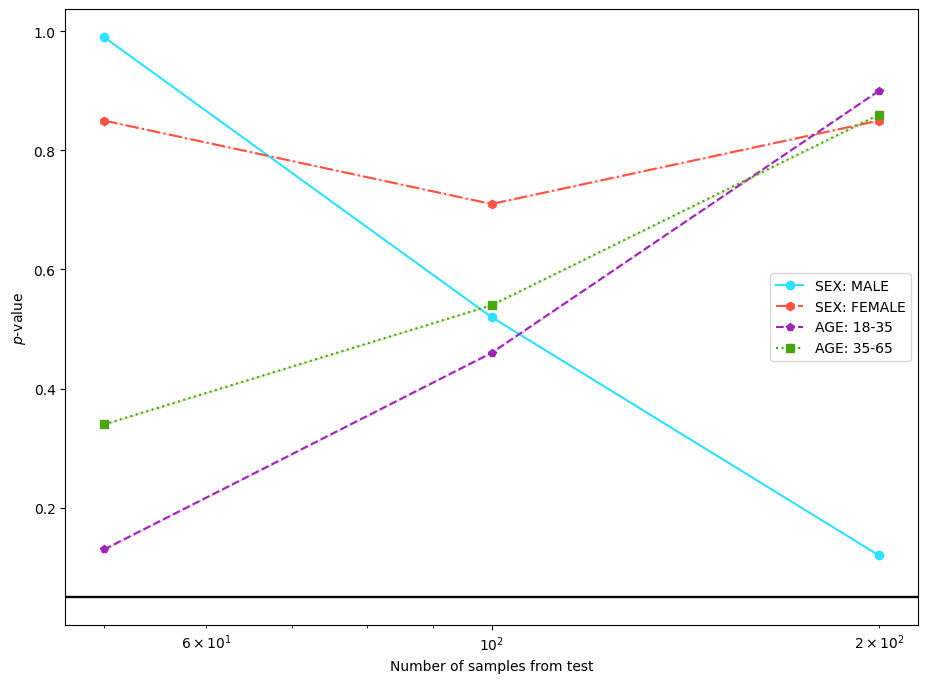

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.62 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.32 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.39 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 13.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 18.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.04 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.15 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.52 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.71 examples/s]

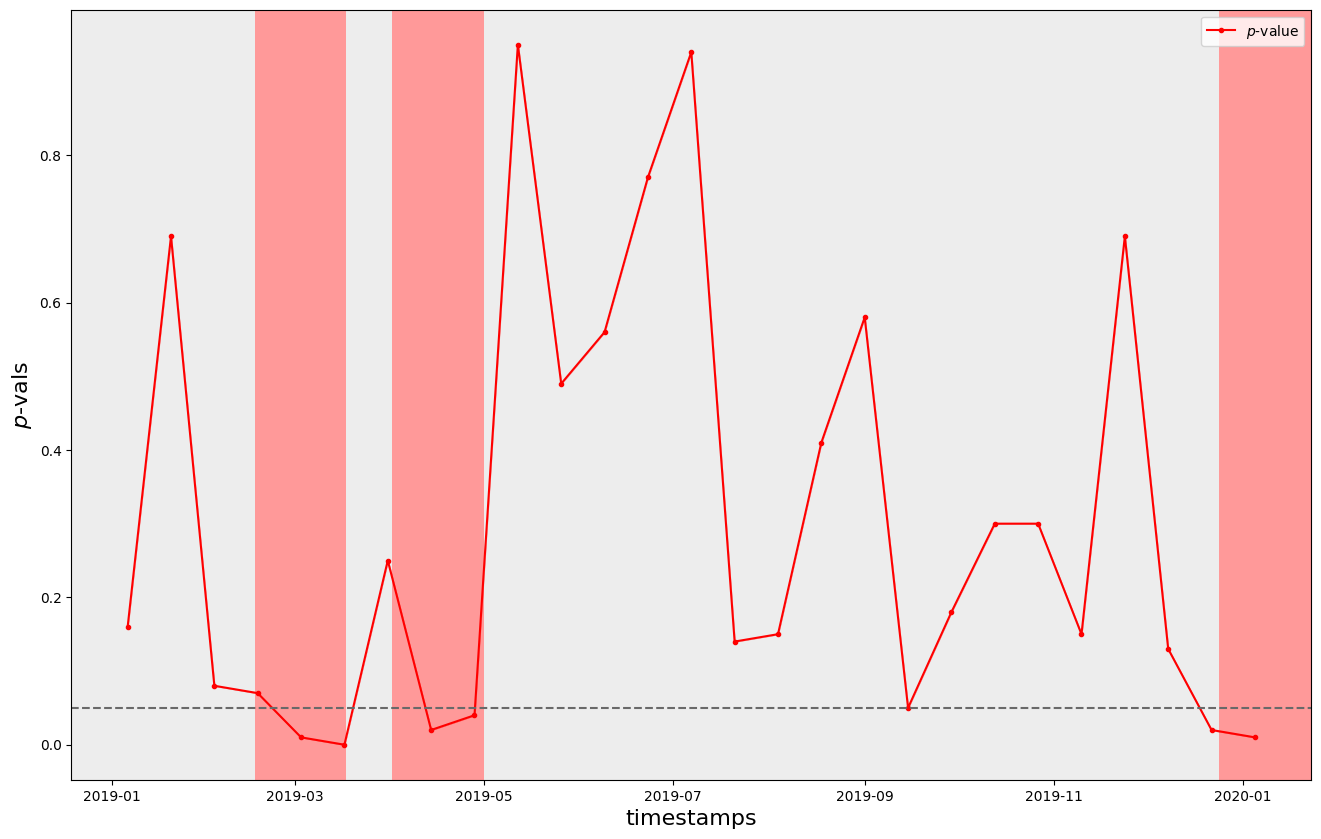

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)